# REINFORCEMENT LEARNING

### Scope
#### This data set conatains the value of binary variable for the 10 different ads in columns.. Basically all ads have different designs and advertising team is wondering which ad will convert the most/which ad will attract the most people to click the ad most then potentially buy the SUV. So, we are going to show these ads to different users online. Once, they connect to the website or to search engine, it can be ads that apears at the top of the page. When you type a research on google, we are going to show one of these ads each time the user connects to the web page and we are going to record the result,whether this user clicked yes or no on the ad.

# 1 - Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv(r'D:\Project\Project_3\Ads_CTR_Optimisation.csv')

## Implementing UCB

In [4]:
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

## Visualising the results

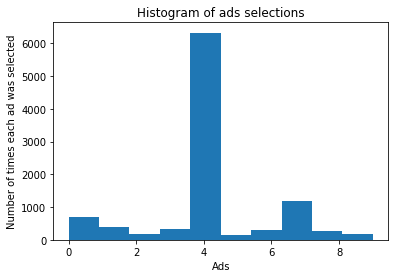

In [5]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

# 2 - Thompson Sampling

## Implementing Thompson Sampling

In [11]:
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

## Visualising the results - Histogram

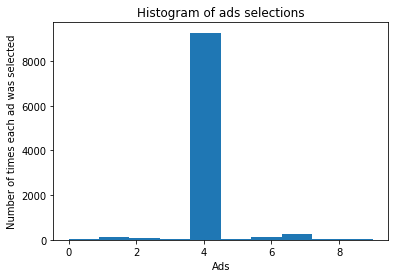

In [12]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

### Conclusion:

#### We typically use the reinforcement learning ML model in robotics and artificial intelligence. Based on the visualisation shown above, it is simple to determine that individuals like the fourth advertisement. Thus, we can say that out of the 10 ads, number 4 is the finest. which we might suggest to organisations for running new car or vehicle advertisements.

#### Note: And I would advise using Thampson sampling for the Fast and highest rate then Upper Confidence Bond (UCB).
